In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
# Constants
length = 0.1
total_time = 60
alpha = 0.0001
delta_x = 0.01
delta_t = 0.1
gamma = (alpha * delta_t) / (delta_x ** 2)
num_points = int(length / delta_x)
num_time_steps = int(total_time / delta_t)

In [4]:
# Matrix to store info each time step
T = np.zeros((num_time_steps, num_points))
# Initial Conditions 
T0 = np.zeros(num_points)

In [5]:
# Source Term - Spatial Boundary Condition
q = np.zeros(num_points)
q[int(num_points / 2)] = 0.2

In [6]:
# Matrix A
on = -2.0 * gamma * np.ones(num_points)
off = +gamma * np.ones(num_points - 1)
A = np.diag(on) + np.diag(off, 1) + np.diag(off, -1)

In [7]:
# Boundary Conditions
A[0, 0] = -1.0 * gamma
A[num_points - 1, num_points - 1] = -1.0 * gamma

In [8]:
T_next = T0
T[0, :] = T0
X = np.linspace(0, length, num_points)

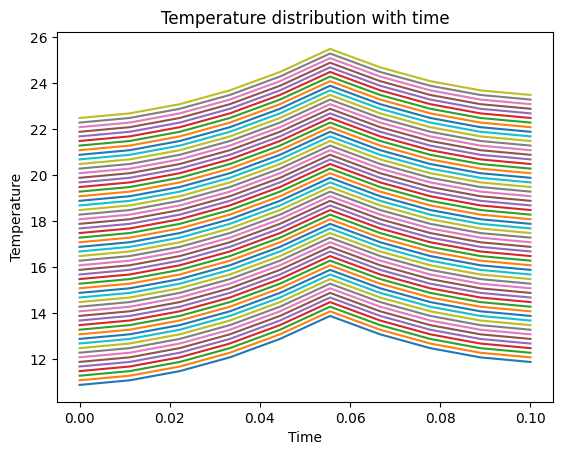

In [10]:
fig, ax = plt.subplots()
for i in range(1, num_time_steps):
    T_next = np.matmul(A, np.transpose(T_next)) + T_next + q
    T[i, :] = T_next
    if i % 10 == 0:
        ax.plot(X, T[i, :])
        ax.set_title('Temperature distribution with time')
        ax.set_xlabel('Time')
        ax.set_ylabel('Temperature')
    # plt.plot(X, T[i, :])
    # plt.title("Temperature distribution with time.")
    # plt.xlabel('Distance (m)')
    # plt.ylabel('Temperature (C)')
    # plt.show()
    # plt.pause(0.0005)